In [1]:
import sys
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path_root = '../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot 

level = 'andamento-nazionale'

path_data = f'{path_root}/data'
# Paths dependant on path_data
path_img_root =  f'{path_data}/imgs/grafici/{level}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/covid19-{level}.csv'

In [2]:
df_n_raw = pd.read_csv(csv_in_name)
# df_n_raw
list(df_n_raw.columns)

['data',
 'ricoverati_con_sintomi',
 'terapia_intensiva',
 'totale_ospedalizzati',
 'isolamento_domiciliare',
 'totale_positivi',
 'variazione_totale_positivi',
 'nuovi_positivi',
 'dimessi_guariti',
 'deceduti',
 'casi_da_sospetto_diagnostico',
 'casi_da_screening',
 'totale_casi',
 'tamponi',
 'casi_testati',
 'ingressi_terapia_intensiva',
 'totale_positivi_test_molecolare',
 'totale_positivi_test_antigenico_rapido',
 'tamponi_test_molecolare',
 'tamponi_test_antigenico_rapido',
 'variazione_terapia_intensiva',
 'variazione_ricoverati_con_sintomi',
 'variazione_totale_ospedalizzati',
 'variazione_isolamento_domiciliare',
 'nuovi_dimessi_guariti',
 'nuovi_deceduti',
 'nuovi_tamponi',
 'nuovi_casi_testati',
 'ti_su_to',
 'to_su_tp',
 'np_su_nt',
 'np_su_nct',
 'var_ti_perc',
 'var_pos_perc',
 'np_log']

In [3]:
# df_n[-2:].iloc[:, 1:]
df_last = df_n_raw[-1:]

In [4]:
# Print stats
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 43947
Nuovi tamponi: 302406.0
Percentuale nuovi positivi/nuovi tamponi: 15.0 %
Nuovi guariti: 62978.0
Nuovi deceduti: 125.0
Variazione positivi ricoverati con sintomi: -220.0
Variazione positivi in terapia intensiva: -6.0
Variazione positivi in isolamento dimiciliare: -18513.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
last_date

datetime.datetime(2022, 5, 6, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc,np_log
0,2022-03-07T17:00:00,8989,610,9599,998761,1008360,-7981,22083,11884397,156017,...,130.0,188274.0,45084.0,6.35,0.95,11.73,48.98,1.16,-0.79,4.344058
1,2022-03-08T17:00:00,8776,592,9368,1002153,1011521,3161,60191,11941805,156201,...,184.0,531194.0,100243.0,6.32,0.93,11.33,60.05,-2.95,0.31,4.779532
2,2022-03-09T17:00:00,8575,563,9138,992784,1001922,-9599,48483,12001063,156357,...,156.0,433961.0,94948.0,6.16,0.91,11.17,51.06,-4.90,-0.95,4.685589
3,2022-03-10T17:00:00,8414,545,8959,962196,971155,-30767,54230,12086850,156493,...,136.0,453341.0,94554.0,6.08,0.92,11.96,57.35,-3.20,-3.07,4.734240
4,2022-03-11T17:00:00,8274,527,8801,967678,976479,5324,53127,12135331,156649,...,156.0,425638.0,92580.0,5.99,0.90,12.48,57.38,-3.30,0.55,4.725315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-05-02T17:00:00,9794,368,10162,1194940,1205102,-26568,18896,15155021,163736,...,124.0,122444.0,28717.0,3.62,0.84,15.43,65.80,0.55,-2.16,4.276370
57,2022-05-03T17:00:00,9695,366,10061,1189899,1199960,-5142,62071,15222419,163889,...,153.0,411047.0,83430.0,3.64,0.84,15.10,74.40,-0.54,-0.43,4.792889
58,2022-05-04T17:00:00,9614,371,9985,1177085,1187070,-12890,47039,15282800,164041,...,152.0,335275.0,79224.0,3.72,0.84,14.03,59.37,1.37,-1.07,4.672458
59,2022-05-05T17:00:00,9384,369,9753,1155371,1165124,-21946,48255,15353323,164179,...,138.0,327178.0,67835.0,3.78,0.84,14.75,71.14,-0.54,-1.85,4.683542


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'nuovi_tamponi': {'label': 'Nuovi tamponi', 'file_name': 'nuovi_tamponi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'},
              'np_log': {'label': 'Nuovi positivi in scala logaritmica', 'file_name': 'nuovi_positivi_log'}}

# Create BarPlot object
bp = BarPlot(df_n, 'data', graph_prop)

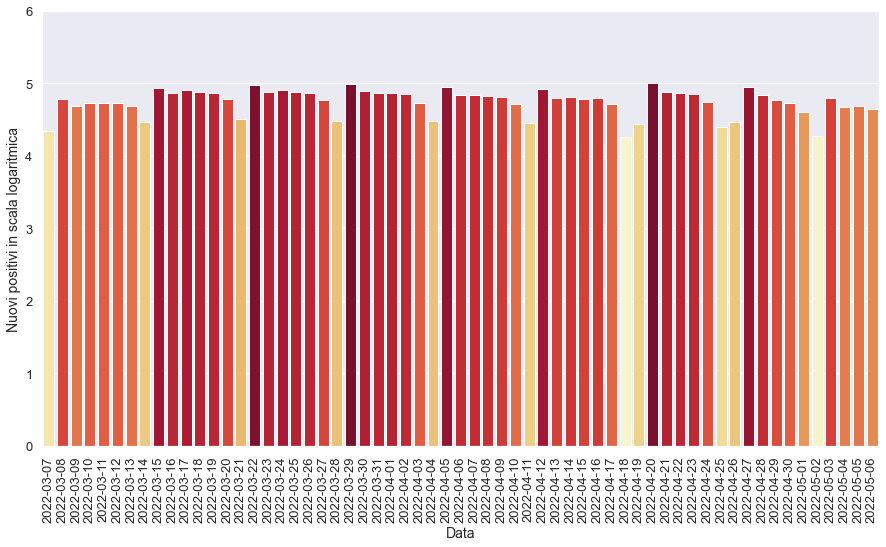

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'np_log'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

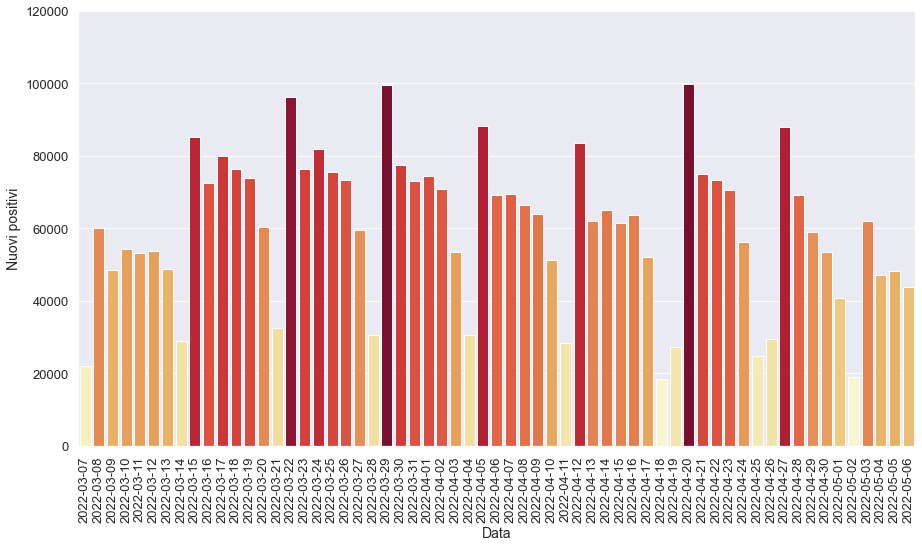

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

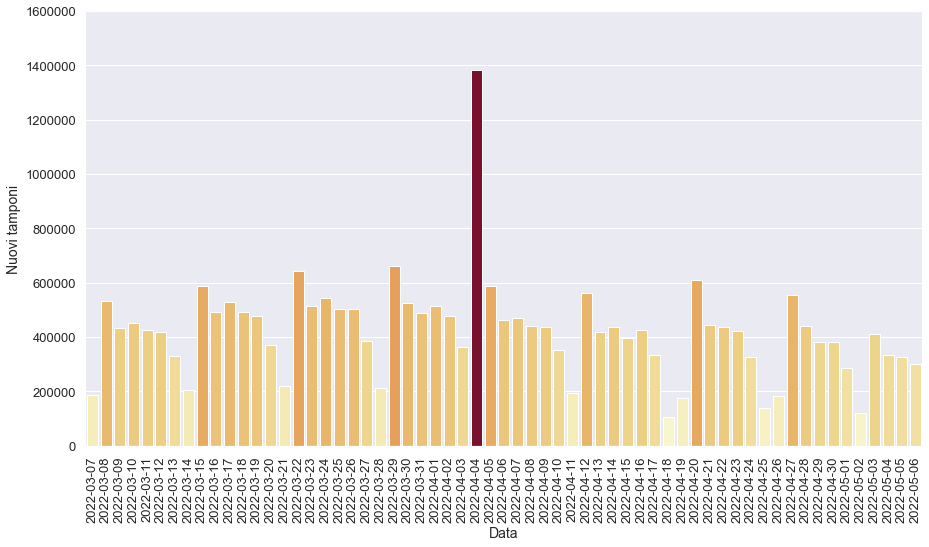

In [10]:
# New swabs
y_col = 'nuovi_tamponi'
fig = bp.draw_bar_plot(y_col=y_col)

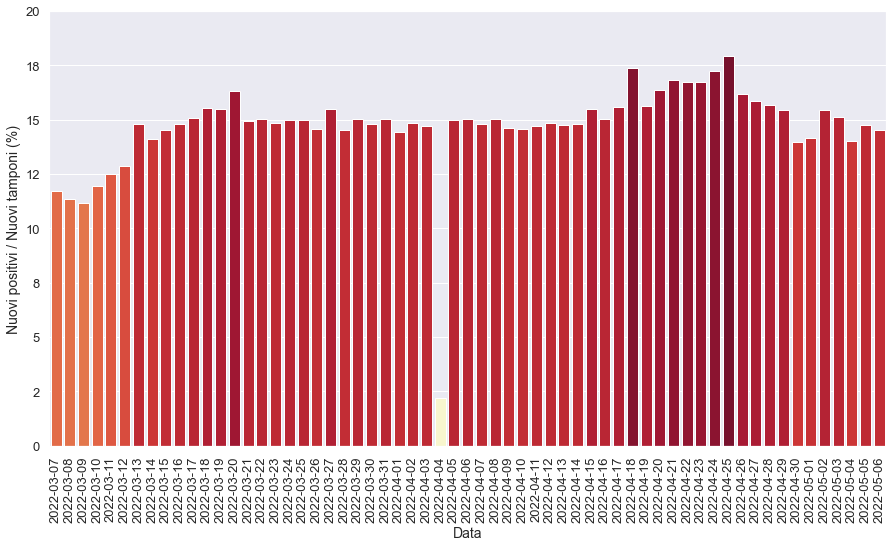

In [11]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

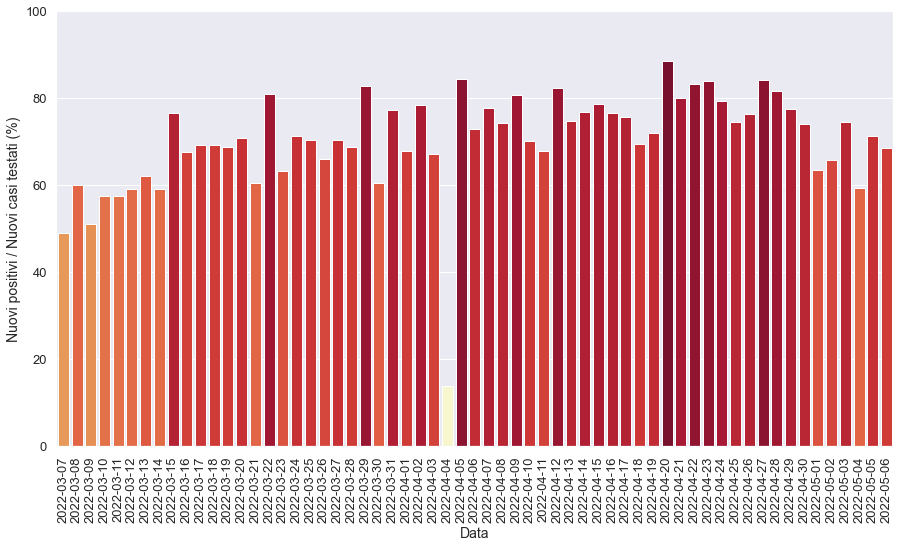

In [12]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

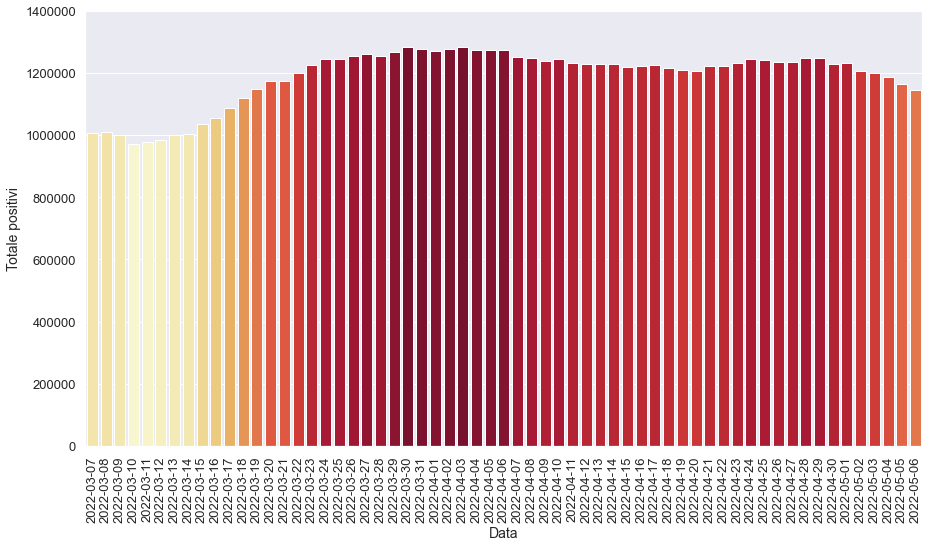

In [13]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

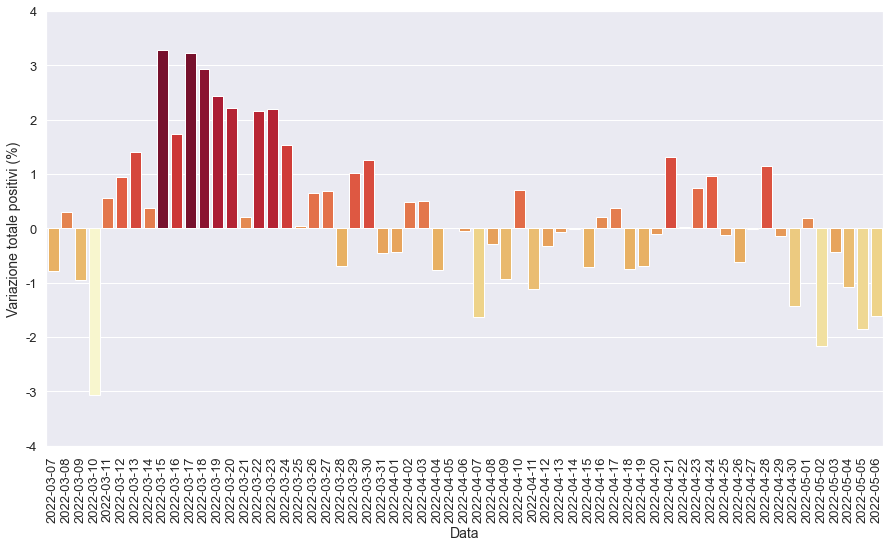

In [14]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

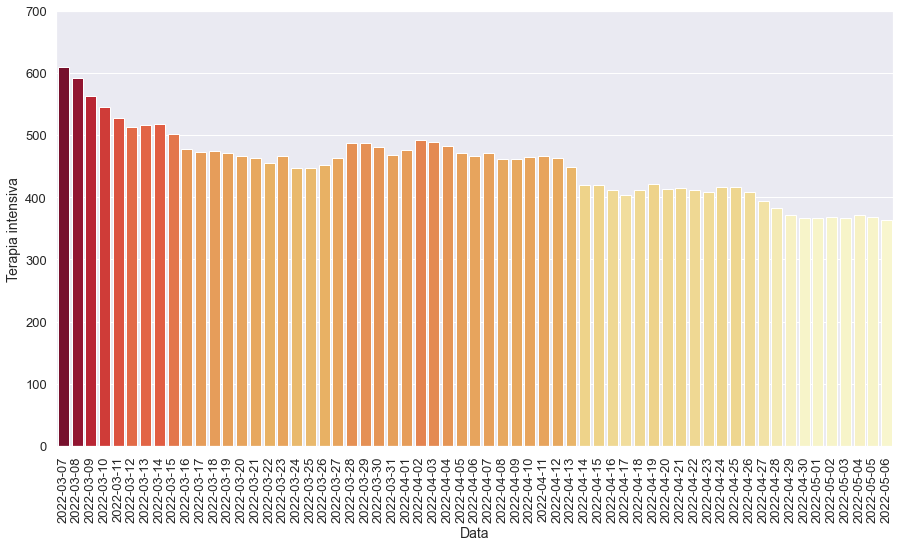

In [15]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

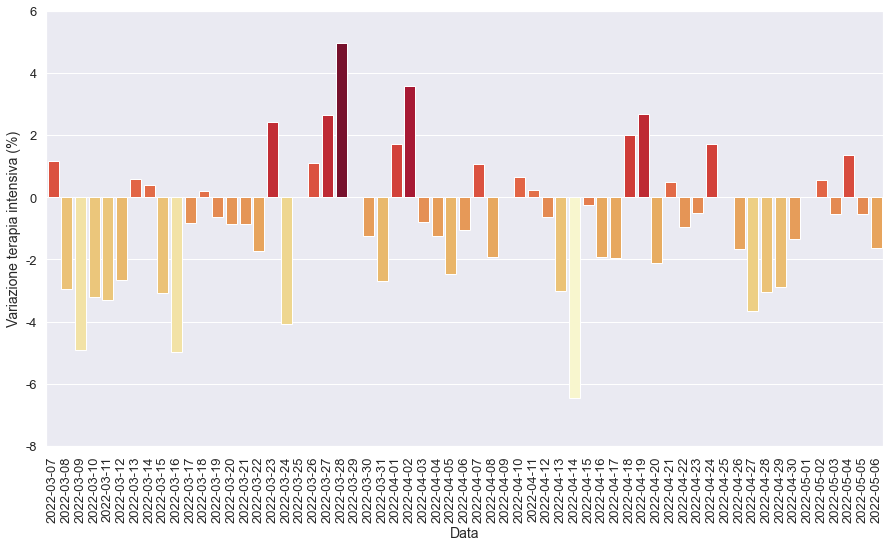

In [16]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

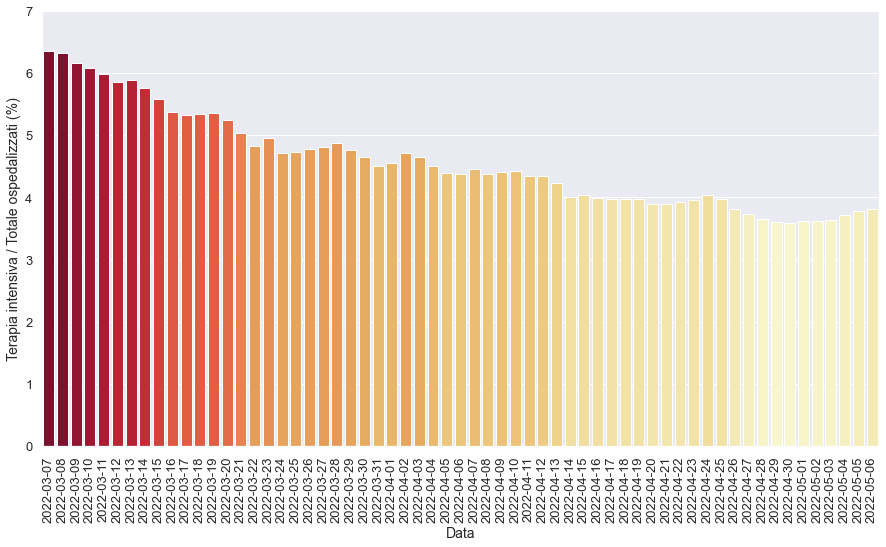

In [17]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

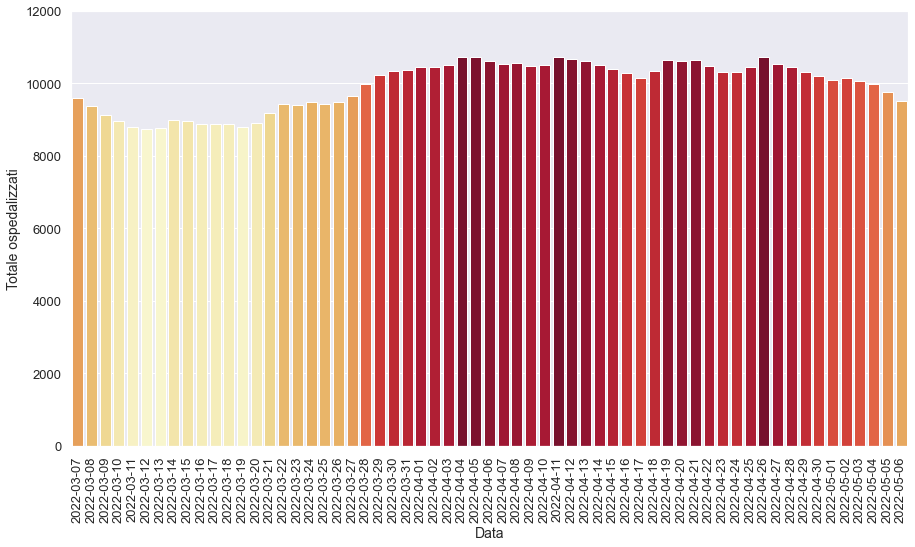

In [18]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

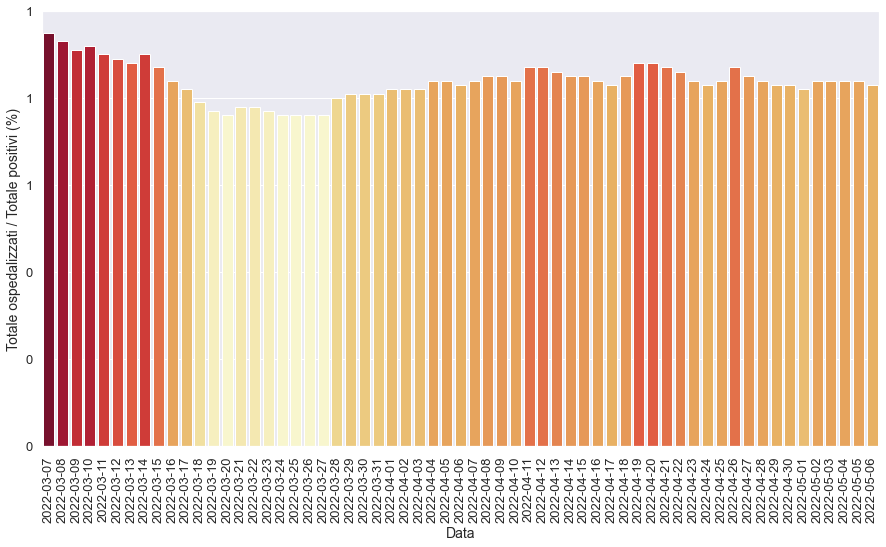

In [19]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

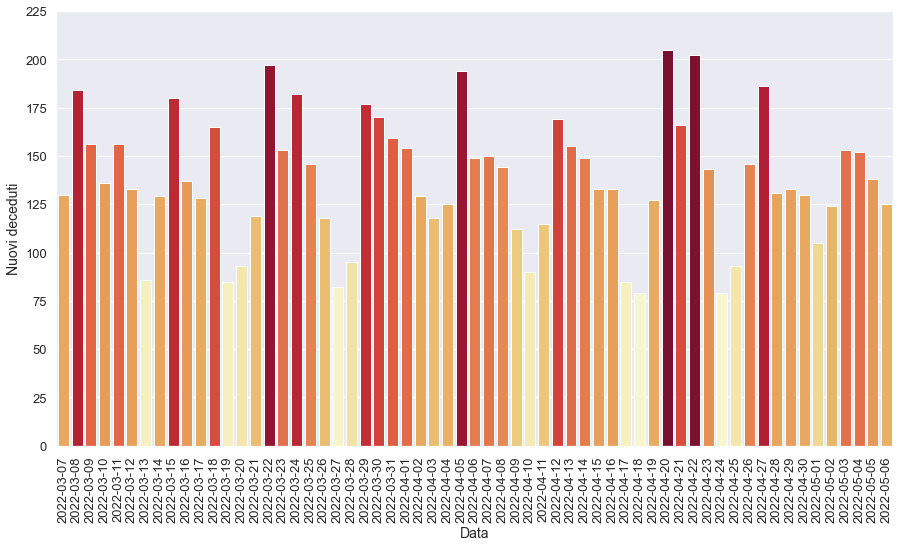

In [20]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

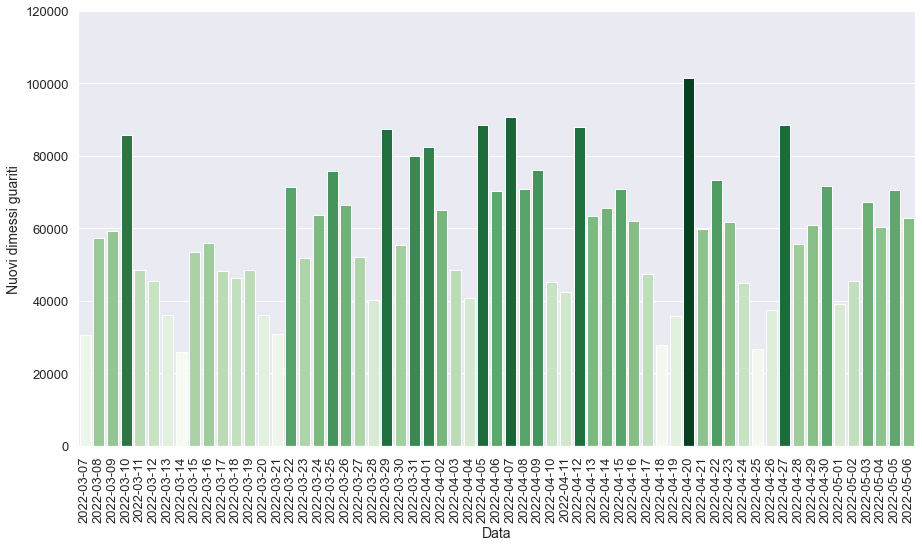

In [21]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [22]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n;

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc,np_log
0,2022-04-06T17:00:00,10164,466,10630,1263227,1273857,-531,69278,13601834,160252,...,149.0,461448.0,95155.0,4.38,0.83,15.01,72.81,-1.06,-0.04,4.840595
1,2022-04-07T17:00:00,10078,471,10549,1242507,1253056,-20801,69596,13692608,160402,...,150.0,469803.0,89483.0,4.46,0.84,14.81,77.78,1.07,-1.63,4.842584
2,2022-04-08T17:00:00,10102,462,10564,1239043,1249607,-3449,66535,13763554,160546,...,144.0,442029.0,89666.0,4.37,0.85,15.05,74.20,-1.91,-0.28,4.823050
3,2022-04-09T17:00:00,10023,462,10485,1227380,1237865,-11742,63992,13839605,160658,...,112.0,438449.0,79232.0,4.41,0.85,14.60,80.77,0.00,-0.94,4.806126
4,2022-04-10T17:00:00,10038,465,10503,1236053,1246556,8691,51376,13884744,160748,...,90.0,352265.0,73329.0,4.43,0.84,14.58,70.06,0.65,0.70,4.710760
5,2022-04-11T17:00:00,10256,466,10722,1222040,1232762,-13794,28368,13927128,160863,...,115.0,192782.0,41812.0,4.35,0.87,14.72,67.85,0.22,-1.11,4.452829
6,2022-04-12T17:00:00,10207,463,10670,1218075,1228745,-4017,83643,14015032,161032,...,169.0,563018.0,101790.0,4.34,0.87,14.86,82.17,-0.64,-0.33,4.922430
7,2022-04-13T17:00:00,10166,449,10615,1217243,1227858,-887,62037,14078350,161187,...,155.0,419995.0,82951.0,4.23,0.86,14.77,74.79,-3.02,-0.07,4.792651
8,2022-04-14T17:00:00,10075,420,10495,1217167,1227662,-196,64951,14144014,161336,...,149.0,438375.0,84600.0,4.00,0.85,14.82,76.77,-6.46,-0.02,4.812586
9,2022-04-15T17:00:00,9980,419,10399,1208525,1218924,-8738,61555,14214909,161469,...,133.0,397482.0,78407.0,4.03,0.85,15.49,78.51,-0.24,-0.71,4.789263


In [23]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

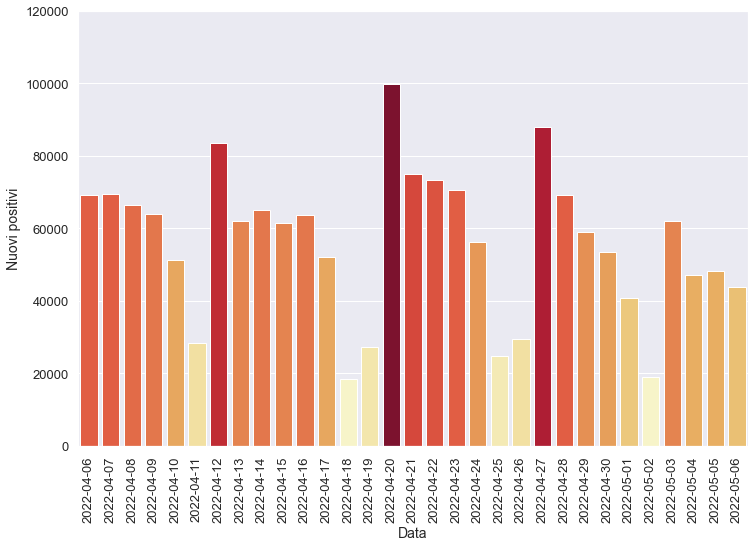

In [24]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

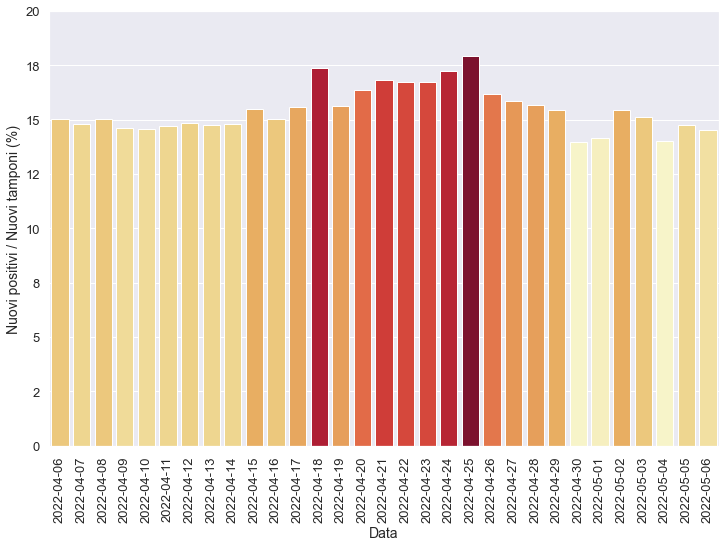

In [25]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

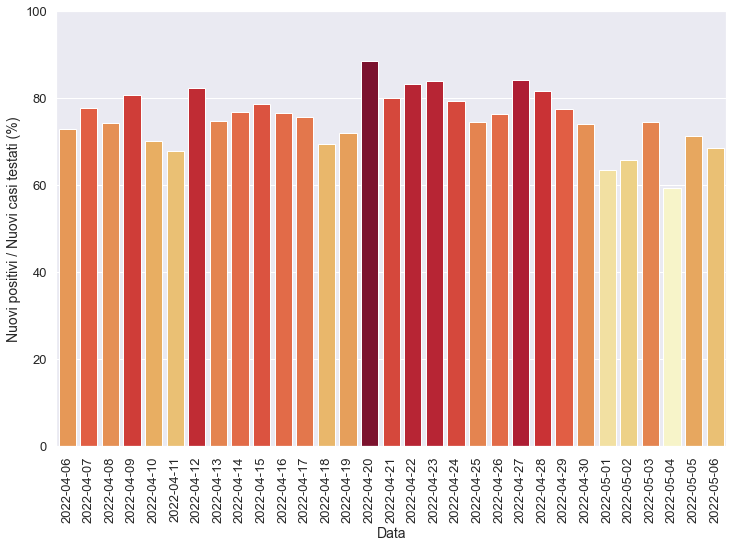

In [26]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

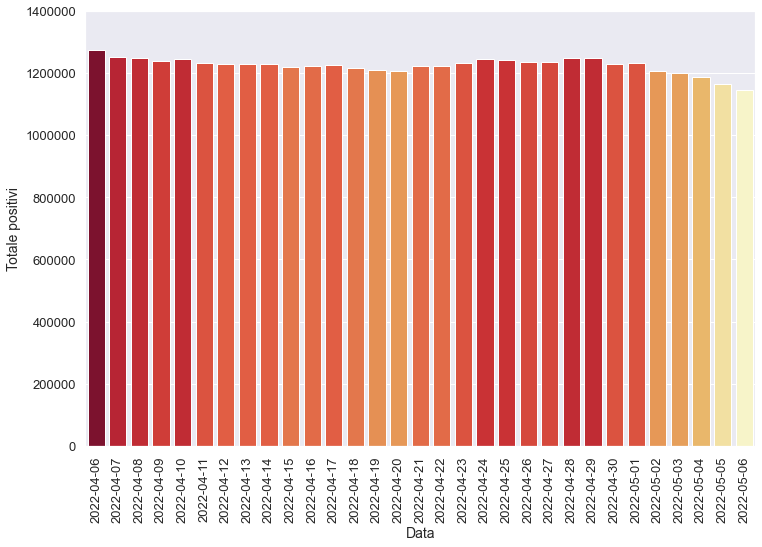

In [27]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

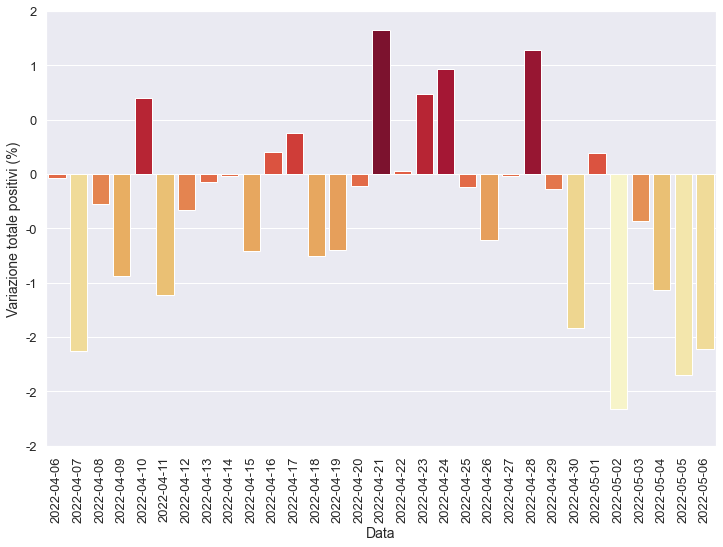

In [28]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

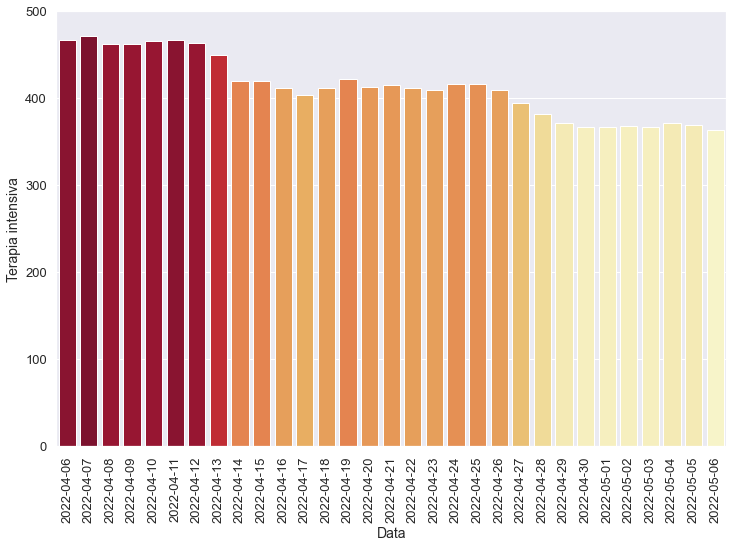

In [29]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

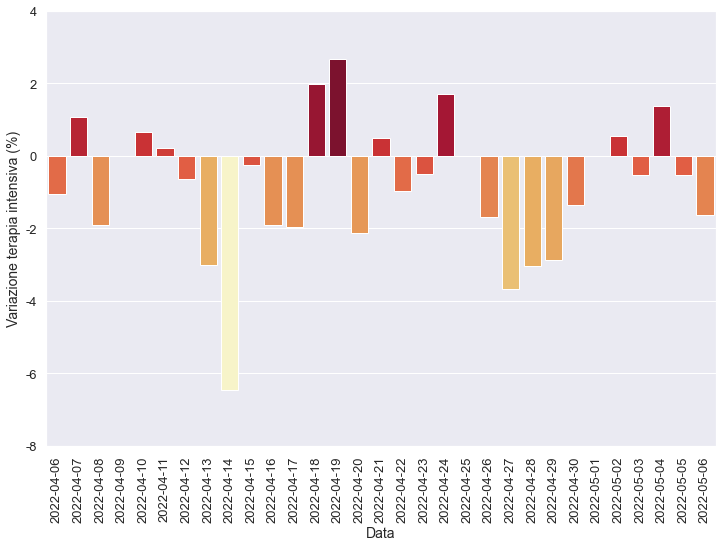

In [30]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

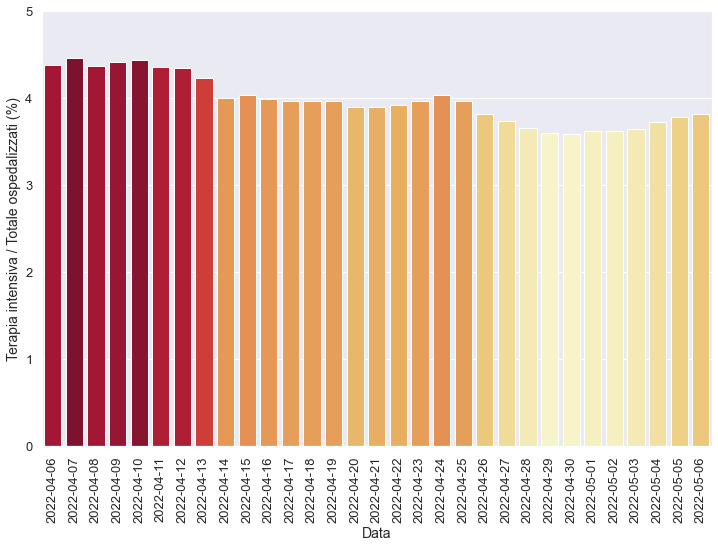

In [31]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

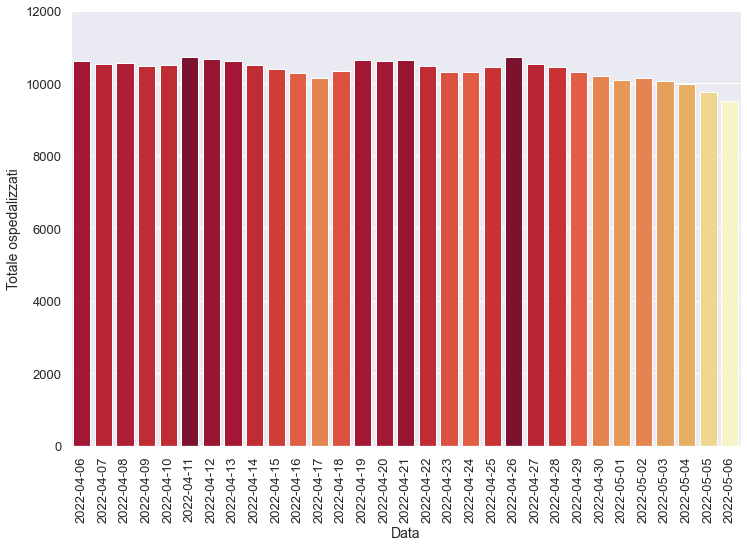

In [32]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

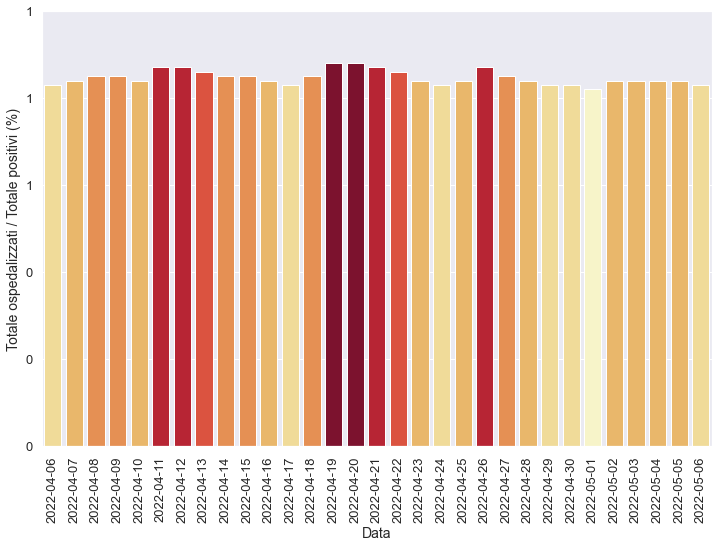

In [33]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

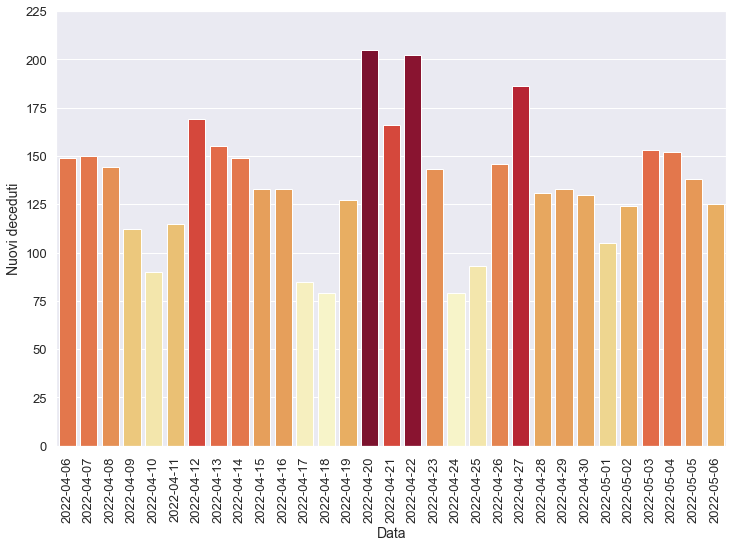

In [34]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

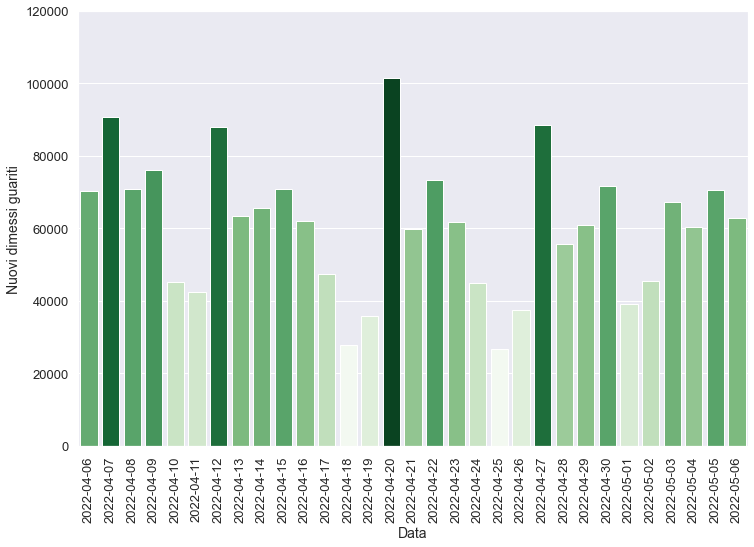

In [35]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [36]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc,np_log
0,2022-04-29T17:00:00,9942,371,10313,1236804,1247117,-1689,58861,14998689,163377,...,133.0,381239.0,76054.0,3.60,0.83,15.44,77.39,-2.88,-0.14,4.769828
1,2022-04-30T17:00:00,9826,366,10192,1219187,1229379,-17738,53602,15070314,163507,...,130.0,383073.0,72336.0,3.59,0.83,13.99,74.10,-1.35,-1.42,4.729181
2,2022-05-01T17:00:00,9738,366,10104,1221566,1231670,2291,40757,15109509,163612,...,105.0,287601.0,64376.0,3.62,0.82,14.17,63.31,0.00,0.19,4.610202
3,2022-05-02T17:00:00,9794,368,10162,1194940,1205102,-26568,18896,15155021,163736,...,124.0,122444.0,28717.0,3.62,0.84,15.43,65.80,0.55,-2.16,4.276370
4,2022-05-03T17:00:00,9695,366,10061,1189899,1199960,-5142,62071,15222419,163889,...,153.0,411047.0,83430.0,3.64,0.84,15.10,74.40,-0.54,-0.43,4.792889
5,2022-05-04T17:00:00,9614,371,9985,1177085,1187070,-12890,47039,15282800,164041,...,152.0,335275.0,79224.0,3.72,0.84,14.03,59.37,1.37,-1.07,4.672458
6,2022-05-05T17:00:00,9384,369,9753,1155371,1165124,-21946,48255,15353323,164179,...,138.0,327178.0,67835.0,3.78,0.84,14.75,71.14,-0.54,-1.85,4.683542
7,2022-05-06T17:00:00,9164,363,9527,1136858,1146385,-18739,43947,15416301,164304,...,125.0,302406.0,64194.0,3.81,0.83,14.53,68.46,-1.63,-1.61,4.642929


In [37]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

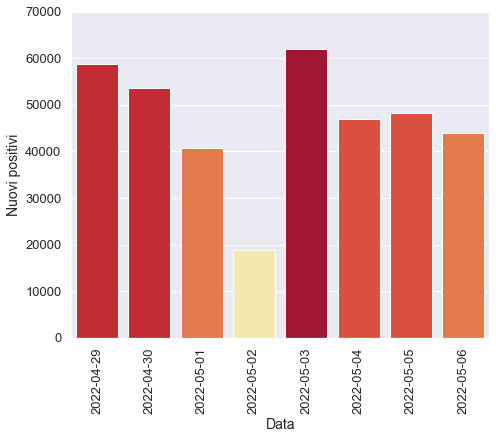

In [38]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

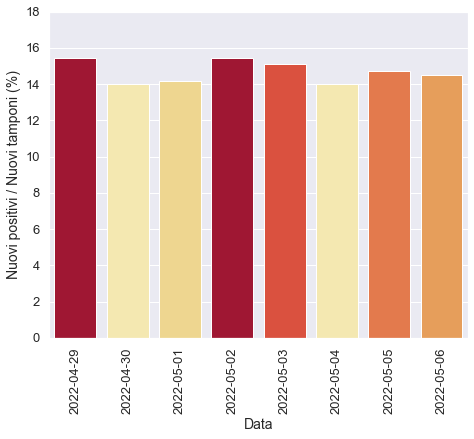

In [39]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

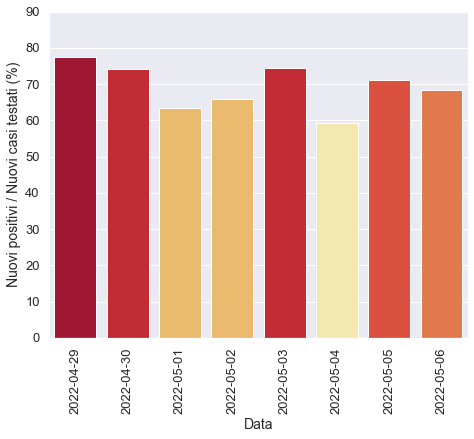

In [40]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

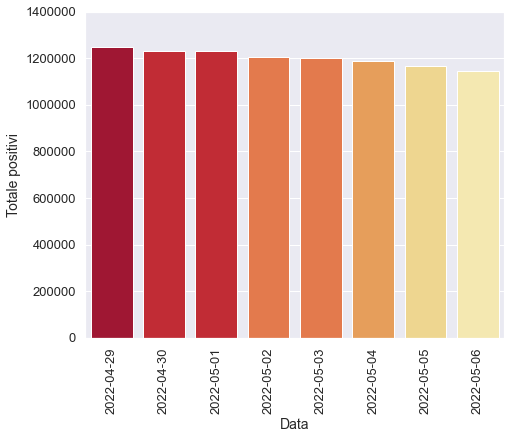

In [41]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

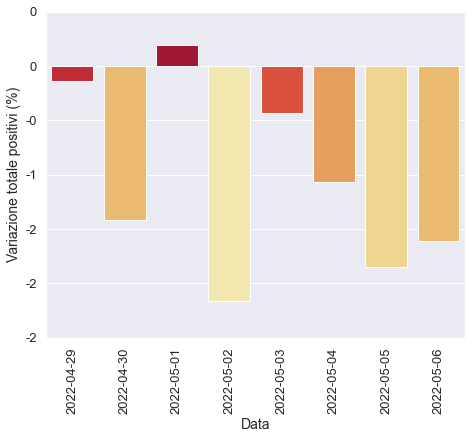

In [42]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

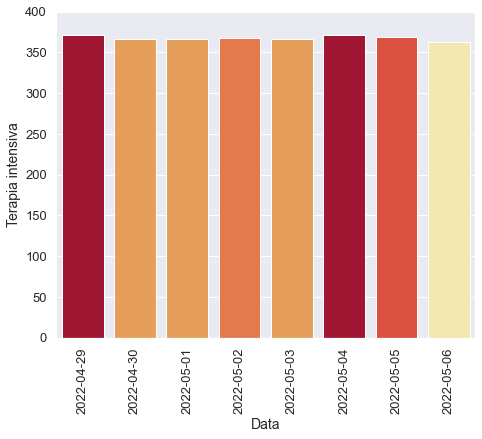

In [43]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

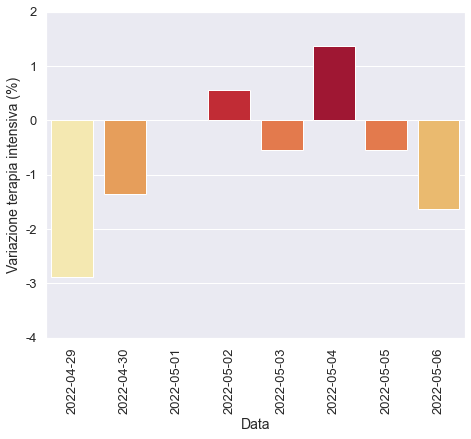

In [44]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

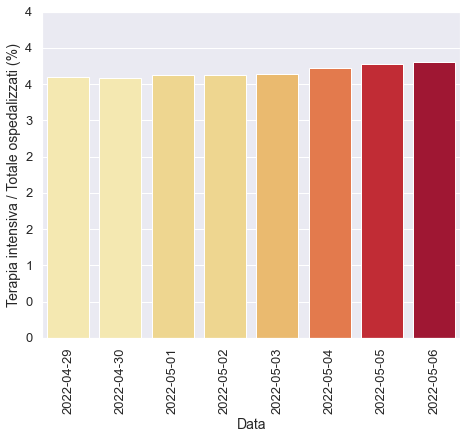

In [45]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

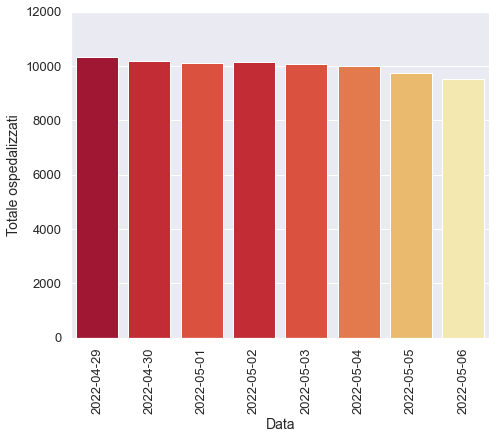

In [46]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

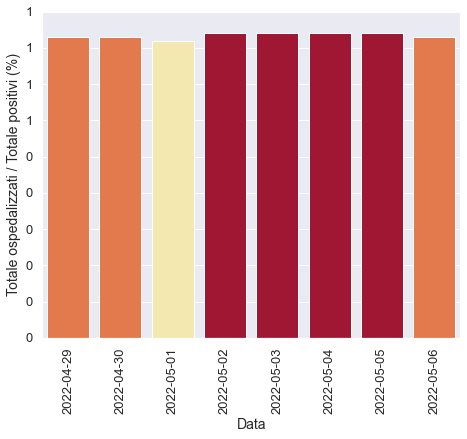

In [47]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

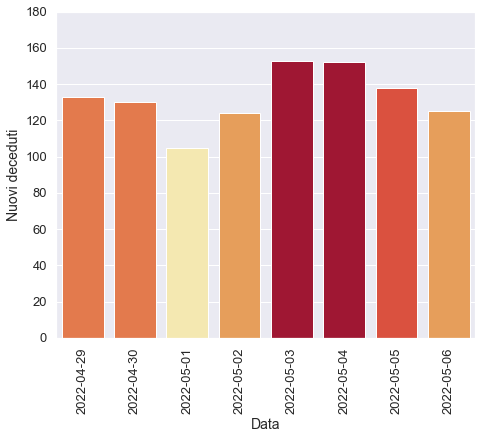

In [48]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

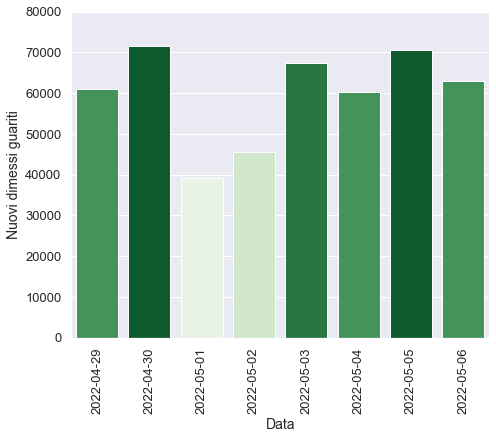

In [49]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)